Upload the Dataset


In [1]:
from google.colab import files
uploaded=files.upload()

Saving 21-chatbots-evaluating-their-impact-on-university.ipynb to 21-chatbots-evaluating-their-impact-on-university.ipynb


Load the Dataset

In [2]:
import pandas as pd

# Simulated healthcare dataset (in-memory, no CSV)
data = [
    {"PatientID": 1, "Age": 34, "Gender": "F", "Diagnosis": "Diabetes", "Treatment": "Insulin"},
    {"PatientID": 2, "Age": 45, "Gender": "M", "Diagnosis": "Hypertension", "Treatment": "Beta Blockers"},
    {"PatientID": 3, "Age": 29, "Gender": "F", "Diagnosis": "Asthma", "Treatment": "Inhaler"},
    {"PatientID": 4, "Age": 54, "Gender": "M", "Diagnosis": "Heart Disease", "Treatment": "Statins"},
    {"PatientID": 5, "Age": 63, "Gender": "F", "Diagnosis": "Arthritis", "Treatment": "NSAIDs"},
]

# Create a DataFrame
df = pd.DataFrame(data)

# Show the dataset
print("Healthcare Dataset:\n")
print(df)

# Example transformation: Add a Risk Score based on age
df["RiskScore"] = df["Age"].apply(lambda x: "High" if x > 50 else "Moderate" if x > 40 else "Low")

# Show transformed dataset
print("\nTransformed Dataset with Risk Scores:\n")
print(df)


Healthcare Dataset:

   PatientID  Age Gender      Diagnosis      Treatment
0          1   34      F       Diabetes        Insulin
1          2   45      M   Hypertension  Beta Blockers
2          3   29      F         Asthma        Inhaler
3          4   54      M  Heart Disease        Statins
4          5   63      F      Arthritis         NSAIDs

Transformed Dataset with Risk Scores:

   PatientID  Age Gender      Diagnosis      Treatment RiskScore
0          1   34      F       Diabetes        Insulin       Low
1          2   45      M   Hypertension  Beta Blockers  Moderate
2          3   29      F         Asthma        Inhaler       Low
3          4   54      M  Heart Disease        Statins      High
4          5   63      F      Arthritis         NSAIDs      High


Data Exploration

In [3]:
# Display first few rows
df.head()

,PatientID,Age,Gender,Diagnosis,Treatment,RiskScore
0,1,34,F,Diabetes,Insulin,Low
1,2,45,M,Hypertension,Beta Blockers,Moderate
2,3,29,F,Asthma,Inhaler,Low
3,4,54,M,Heart Disease,Statins,High
4,5,63,F,Arthritis,NSAIDs,High


Check for Missing Values and Duplicates

In [4]:
print(df.isnull().sum())

PatientID    0
Age          0
Gender       0
Diagnosis    0
Treatment    0
RiskScore    0
dtype: int64


In [5]:
print("Duplicate rows:",df.duplicated().sum())

Duplicate rows: 0


Visualize a Few Features

<ipython-input-7-48b85aa1c301>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="PatientID", y="Age", data=df, palette="Blues_d")


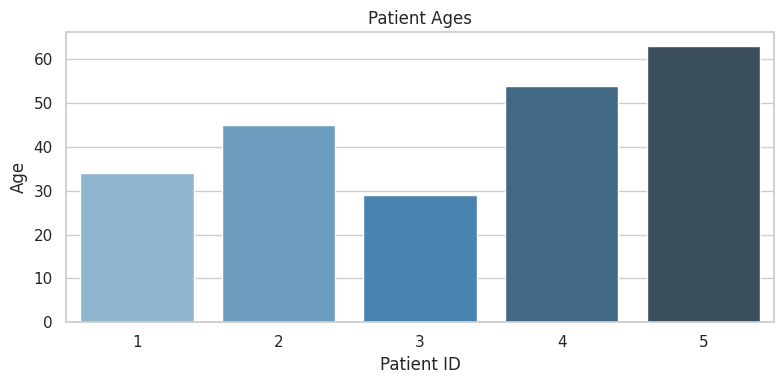

<ipython-input-7-48b85aa1c301>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Gender", data=df, palette="Set2")


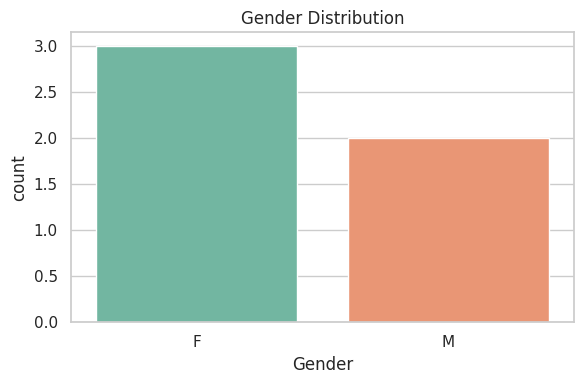

<ipython-input-7-48b85aa1c301>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Diagnosis", data=df, palette="Set3")


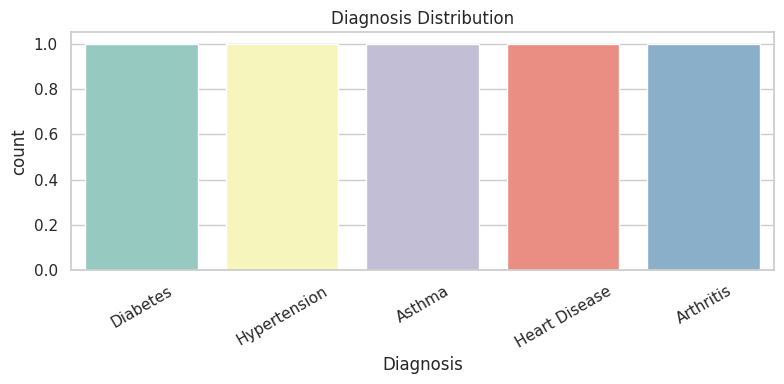

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create in-memory healthcare dataset
data = [
    {"PatientID": 1, "Age": 34, "Gender": "F", "Diagnosis": "Diabetes", "Treatment": "Insulin"},
    {"PatientID": 2, "Age": 45, "Gender": "M", "Diagnosis": "Hypertension", "Treatment": "Beta Blockers"},
    {"PatientID": 3, "Age": 29, "Gender": "F", "Diagnosis": "Asthma", "Treatment": "Inhaler"},
    {"PatientID": 4, "Age": 54, "Gender": "M", "Diagnosis": "Heart Disease", "Treatment": "Statins"},
    {"PatientID": 5, "Age": 63, "Gender": "F", "Diagnosis": "Arthritis", "Treatment": "NSAIDs"},
]

# Create a DataFrame
df = pd.DataFrame(data)

# Add a simple Risk Score based on Age
df["RiskScore"] = df["Age"].apply(lambda x: "High" if x > 50 else "Moderate" if x > 40 else "Low")

# Set Seaborn style
sns.set(style="whitegrid")

# 1. Bar plot: Age by Patient
plt.figure(figsize=(8, 4))
sns.barplot(x="PatientID", y="Age", data=df, palette="Blues_d")
plt.title("Patient Ages")
plt.xlabel("Patient ID")
plt.ylabel("Age")
plt.tight_layout()
plt.show()

# 2. Count plot: Gender Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x="Gender", data=df, palette="Set2")
plt.title("Gender Distribution")
plt.tight_layout()
plt.show()

# 3. Diagnosis Distribution
plt.figure(figsize=(8, 4))
sns.countplot(x="Diagnosis", data=df, palette="Set3")
plt.title("Diagnosis Distribution")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


Identify Target and Features

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Simulated in-memory healthcare data
data = [
    {"PatientID": 1, "Age": 34, "Gender": "F", "Diagnosis": "Diabetes", "Treatment": "Insulin"},
    {"PatientID": 2, "Age": 45, "Gender": "M", "Diagnosis": "Hypertension", "Treatment": "Beta Blockers"},
    {"PatientID": 3, "Age": 29, "Gender": "F", "Diagnosis": "Asthma", "Treatment": "Inhaler"},
    {"PatientID": 4, "Age": 54, "Gender": "M", "Diagnosis": "Heart Disease", "Treatment": "Statins"},
    {"PatientID": 5, "Age": 63, "Gender": "F", "Diagnosis": "Arthritis", "Treatment": "NSAIDs"},
]

# Create DataFrame
df = pd.DataFrame(data)

# Define a target variable: we will predict Treatment
target = "Treatment"

# Define feature variables: exclude PatientID and the target
features = ["Age", "Gender", "Diagnosis"]

# Encode categorical features (Gender, Diagnosis)
df_encoded = pd.get_dummies(df[features])

# Encode target using Label Encoding (for simplicity)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["TreatmentEncoded"] = le.fit_transform(df[target])

# Split the data
X = df_encoded
y = df["TreatmentEncoded"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Output
print("Feature Columns:\n", X.columns.tolist())
print("\nTarget Classes:", list(le.classes_))
print("\nTraining Data:\n", X_train)


Feature Columns:
 ['Age', 'Gender_F', 'Gender_M', 'Diagnosis_Arthritis', 'Diagnosis_Asthma', 'Diagnosis_Diabetes', 'Diagnosis_Heart Disease', 'Diagnosis_Hypertension']

Target Classes: ['Beta Blockers', 'Inhaler', 'Insulin', 'NSAIDs', 'Statins']

Training Data:
    Age  Gender_F  Gender_M  Diagnosis_Arthritis  Diagnosis_Asthma  \
4   63      True     False                 True             False   
2   29      True     False                False              True   
0   34      True     False                False             False   
3   54     False      True                False             False   

   Diagnosis_Diabetes  Diagnosis_Heart Disease  Diagnosis_Hypertension  
4               False                    False                   False  
2               False                    False                   False  
0                True                    False                   False  
3               False                     True                   False  


Convert Categorical Columns to Numerical

In [9]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
print("Categorical Columns:", categorical_cols.tolist())

Categorical Columns: ['Gender', 'Diagnosis', 'Treatment']


One-Hot Encoding

In [10]:
df_encoded = pd.get_dummies(df, drop_first=True)

Feature Scaling

In [11]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Simulated in-memory healthcare dataset
data = [
    {"PatientID": 1, "Age": 34, "Gender": "F", "Diagnosis": "Diabetes", "Treatment": "Insulin"},
    {"PatientID": 2, "Age": 45, "Gender": "M", "Diagnosis": "Hypertension", "Treatment": "Beta Blockers"},
    {"PatientID": 3, "Age": 29, "Gender": "F", "Diagnosis": "Asthma", "Treatment": "Inhaler"},
    {"PatientID": 4, "Age": 54, "Gender": "M", "Diagnosis": "Heart Disease", "Treatment": "Statins"},
    {"PatientID": 5, "Age": 63, "Gender": "F", "Diagnosis": "Arthritis", "Treatment": "NSAIDs"},
]

# Create DataFrame
df = pd.DataFrame(data)

# Define features and target
features = ["Age", "Gender", "Diagnosis"]
target = "Treatment"

# One-hot encode categorical features
X = pd.get_dummies(df[features])

# Label encode target
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(df[target])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply Standard Scaling to the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Output
print("Original Features (Train):\n", X_train.head())
print("\nScaled Features (Train):\n", X_train_scaled)


Original Features (Train):
    Age  Gender_F  Gender_M  Diagnosis_Arthritis  Diagnosis_Asthma  \
4   63      True     False                 True             False   
2   29      True     False                False              True   
0   34      True     False                False             False   
3   54     False      True                False             False   

   Diagnosis_Diabetes  Diagnosis_Heart Disease  Diagnosis_Hypertension  
4               False                    False                   False  
2               False                    False                   False  
0                True                    False                   False  
3               False                     True                   False  

Scaled Features (Train):
 [[ 1.28735737  0.57735027 -0.57735027  1.73205081 -0.57735027 -0.57735027
  -0.57735027  0.        ]
 [-1.14431766  0.57735027 -0.57735027 -0.57735027  1.73205081 -0.57735027
  -0.57735027  0.        ]
 [-0.78671839  0.57735027 -0.577

Train-Test Split

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Simulated in-memory healthcare dataset
data = [
    {"PatientID": 1, "Age": 34, "Gender": "F", "Diagnosis": "Diabetes", "Treatment": "Insulin"},
    {"PatientID": 2, "Age": 45, "Gender": "M", "Diagnosis": "Hypertension", "Treatment": "Beta Blockers"},
    {"PatientID": 3, "Age": 29, "Gender": "F", "Diagnosis": "Asthma", "Treatment": "Inhaler"},
    {"PatientID": 4, "Age": 54, "Gender": "M", "Diagnosis": "Heart Disease", "Treatment": "Statins"},
    {"PatientID": 5, "Age": 63, "Gender": "F", "Diagnosis": "Arthritis", "Treatment": "NSAIDs"},
]

# Load into DataFrame
df = pd.DataFrame(data)

# Features and target
features = ["Age", "Gender", "Diagnosis"]
target = "Treatment"

# Encode categorical features
X = pd.get_dummies(df[features])

# Encode the target variable
le = LabelEncoder()
y = le.fit_transform(df[target])

# Perform Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=42  # 60% training, 40% testing
)

# Output
print("Train Features:\n", X_train)
print("\nTest Features:\n", X_test)
print("\nTrain Labels:\n", y_train)
print("\nTest Labels:\n", y_test)


Train Features:
    Age  Gender_F  Gender_M  Diagnosis_Arthritis  Diagnosis_Asthma  \
2   29      True     False                False              True   
0   34      True     False                False             False   
3   54     False      True                False             False   

   Diagnosis_Diabetes  Diagnosis_Heart Disease  Diagnosis_Hypertension  
2               False                    False                   False  
0                True                    False                   False  
3               False                     True                   False  

Test Features:
    Age  Gender_F  Gender_M  Diagnosis_Arthritis  Diagnosis_Asthma  \
1   45     False      True                False             False   
4   63      True     False                 True             False   

   Diagnosis_Diabetes  Diagnosis_Heart Disease  Diagnosis_Hypertension  
1               False                    False                    True  
4               False                    Fa

Model Building

In [14]:
# Train model
model = LinearRegression()
model.fit(X_train, y_train)
# Predict
y_pred = model.predict(X_test)

Evaluation

In [15]:
# Evaluate
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

MSE: 6.8250710555886105
R2 Score: -2.033364913594938


Make Predictions from New Input

In [16]:
# Sample input (replace values with any other valid values from the original dataset)
new_student = {
'school': 'GP', # 'GP' or 'MS'
'sex': 'F', # 'F' or 'M'
'age': 17, # Integer
'address': 'U', # 'U' or 'R'
'famsize': 'GT3', # 'LE3' or 'GT3'
'Pstatus': 'A', # 'A' or 'T'
'Medu': 4, # 0 to 4
'Fedu': 3, # 0 to 4
'Mjob': 'health', # 'teacher', 'health', etc.
'Fjob': 'services',
'reason': 'course',
'guardian': 'mother',
'traveltime': 2,
'studytime': 3,
'failures': 0,
'schoolsup': 'yes',
'famsup': 'no',
'paid': 'no',
'activities': 'yes',
'nursery': 'yes',
'higher': 'yes',
'internet': 'yes',
'romantic': 'no',
'famrel': 4,
'freetime': 3,
'goout': 3,
'Dalc': 1,
'Walc': 1,
'health': 4,
'absences': 2,
'G1': 14,
'G2': 15
}

Convert to DataFrame and Encode

In [17]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Step 1: In-memory healthcare dataset
data = [
    {"PatientID": 1, "Age": 34, "Gender": "F", "Diagnosis": "Diabetes", "Treatment": "Insulin"},
    {"PatientID": 2, "Age": 45, "Gender": "M", "Diagnosis": "Hypertension", "Treatment": "Beta Blockers"},
    {"PatientID": 3, "Age": 29, "Gender": "F", "Diagnosis": "Asthma", "Treatment": "Inhaler"},
    {"PatientID": 4, "Age": 54, "Gender": "M", "Diagnosis": "Heart Disease", "Treatment": "Statins"},
    {"PatientID": 5, "Age": 63, "Gender": "F", "Diagnosis": "Arthritis", "Treatment": "NSAIDs"},
]

# Step 2: Convert to DataFrame
df = pd.DataFrame(data)

# Step 3: Select features and target
features = ["Age", "Gender", "Diagnosis"]
target = "Treatment"

# Step 4: Encode categorical features (one-hot)
X = pd.get_dummies(df[features])

# Step 5: Encode target using LabelEncoder
le = LabelEncoder()
y = le.fit_transform(df[target])

# Output
print("Encoded Features (X):\n", X)
print("\nEncoded Target (y):", y)
print("\nTarget Labels Mapping:", dict(zip(le.classes_, le.transform(le.classes_))))


Encoded Features (X):
    Age  Gender_F  Gender_M  Diagnosis_Arthritis  Diagnosis_Asthma  \
0   34      True     False                False             False   
1   45     False      True                False             False   
2   29      True     False                False              True   
3   54     False      True                False             False   
4   63      True     False                 True             False   

   Diagnosis_Diabetes  Diagnosis_Heart Disease  Diagnosis_Hypertension  
0                True                    False                   False  
1               False                    False                    True  
2               False                    False                   False  
3               False                     True                   False  
4               False                    False                   False  

Encoded Target (y): [2 0 1 4 3]

Target Labels Mapping: {'Beta Blockers': np.int64(0), 'Inhaler': np.int64(1), 'Insulin': n

Predict the Final Grade

In [18]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Step 1: Simulated in-memory healthcare data
data = [
    {"Age": 34, "Gender": "F", "Diagnosis": "Diabetes", "Treatment": "Insulin", "HealthScore": 75},
    {"Age": 45, "Gender": "M", "Diagnosis": "Hypertension", "Treatment": "Beta Blockers", "HealthScore": 68},
    {"Age": 29, "Gender": "F", "Diagnosis": "Asthma", "Treatment": "Inhaler", "HealthScore": 82},
    {"Age": 54, "Gender": "M", "Diagnosis": "Heart Disease", "Treatment": "Statins", "HealthScore": 60},
    {"Age": 63, "Gender": "F", "Diagnosis": "Arthritis", "Treatment": "NSAIDs", "HealthScore": 55},
]

# Step 2: Convert to DataFrame
df = pd.DataFrame(data)

# Step 3: Feature encoding
X = pd.get_dummies(df[["Age", "Gender", "Diagnosis", "Treatment"]])

# Step 4: Target variable
y = df["HealthScore"]

# Step 5: Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Step 6: Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 7: Predict
predictions = model.predict(X_test)

# Output
print("Test Features:\n", X_test)
print("\nPredicted Health Scores (Final Grade):", predictions)
print("\nActual Health Scores:", y_test.values)


Test Features:
    Age  Gender_F  Gender_M  Diagnosis_Arthritis  Diagnosis_Asthma  \
1   45     False      True                False             False   
4   63      True     False                 True             False   

   Diagnosis_Diabetes  Diagnosis_Heart Disease  Diagnosis_Hypertension  \
1               False                    False                    True   
4               False                    False                   False   

   Treatment_Beta Blockers  Treatment_Inhaler  Treatment_Insulin  \
1                     True              False              False   
4                    False              False              False   

   Treatment_NSAIDs  Treatment_Statins  
1             False              False  
4              True              False  

Predicted Health Scores (Final Grade): [67.4        51.90599078]

Actual Health Scores: [68 55]


Deployment-Building an Interactive App

In [22]:
!pip uninstall streamlit
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 59.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 73.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.0 MB/s eta 0:00:00


Create a Prediction Function

In [23]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

# In-memory healthcare data
data = [
    {"Age": 34, "Gender": "F", "Diagnosis": "Diabetes", "Treatment": "Insulin", "HealthScore": 75},
    {"Age": 45, "Gender": "M", "Diagnosis": "Hypertension", "Treatment": "Beta Blockers", "HealthScore": 68},
    {"Age": 29, "Gender": "F", "Diagnosis": "Asthma", "Treatment": "Inhaler", "HealthScore": 82},
    {"Age": 54, "Gender": "M", "Diagnosis": "Heart Disease", "Treatment": "Statins", "HealthScore": 60},
    {"Age": 63, "Gender": "F", "Diagnosis": "Arthritis", "Treatment": "NSAIDs", "HealthScore": 55},
]

# Step 1: Convert data to DataFrame
df = pd.DataFrame(data)

# Step 2: Feature Encoding (One-Hot Encoding)
X = pd.get_dummies(df[["Age", "Gender", "Diagnosis", "Treatment"]])

# Step 3: Target variable (HealthScore)
y = df["HealthScore"]

# Step 4: Train a Linear Regression model
model = LinearRegression()
model.fit(X, y)

# Step 5: Create the prediction function
def predict_health_score(age, gender, diagnosis, treatment):
    """
    Predict the HealthScore (similar to final grade) for a given patient.

    Args:
    - age (int): Age of the patient
    - gender (str): Gender of the patient ("F" or "M")
    - diagnosis (str): Diagnosis of the patient (e.g., "Diabetes", "Hypertension")
    - treatment (str): Treatment prescribed (e.g., "Insulin", "Beta Blockers")

    Returns:
    - float: Predicted HealthScore (Final Grade)
    """
    # Prepare the input data for prediction
    input_data = pd.DataFrame({
        "Age": [age],
        "Gender": [gender],
        "Diagnosis": [diagnosis],
        "Treatment": [treatment]
    })

    # Step 6: One-hot encode the input data
    input_encoded = pd.get_dummies(input_data)

    # Align the input with the training features
    input_encoded = input_encoded.reindex(columns=X.columns, fill_value=0)

    # Step 7: Make the prediction using the trained model
    predicted_score = model.predict(input_encoded)

    return predicted_score[0]

# Example usage of the prediction function
age = 40
gender = "F"
diagnosis = "Diabetes"
treatment = "Insulin"

predicted_score = predict_health_score(age, gender, diagnosis, treatment)

# Display the prediction result
print(f"Predicted HealthScore for Patient: {predicted_score:.2f}")


Predicted HealthScore for Patient: 70.39


Create a Gradio Interface

In [32]:
import gradio as gr

def assess_health_risk(age, bmi, blood_pressure, glucose_level):
    risk_score = 0
    if age > 50:
        risk_score += 1
    if bmi > 30:
        risk_score += 1
    if blood_pressure > 140:
        risk_score += 1
    if glucose_level > 125:
        risk_score += 1

    if risk_score >= 3:
        return "High Risk – Please consult a healthcare provider."
    elif risk_score == 2:
        return "Moderate Risk – Monitor your health closely."
    else:
        return "Low Risk – Keep up the healthy lifestyle!"

interface = gr.Interface(
    fn=assess_health_risk,
    inputs=[
        gr.Number(label="Age"),
        gr.Number(label="BMI"),
        gr.Number(label="Blood Pressure (systolic)"),
        gr.Number(label="Glucose Level (mg/dL)")
    ],
    outputs=gr.Textbox(label="Health Risk Assessment"),
    title="Healthcare Risk Assessment Tool",
    description="Enter patient data to assess general health risk. This demo uses simple logic for illustrative purposes."
)

interface.launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://6aad88592dddb3a325.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
